In [57]:
%load_ext autoreload
%autoreload 2

import os
import sys
from pprint import pprint
from dotenv import load_dotenv
from tqdm import tqdm
from pathlib import Path

from IPython.display import Image, display
from langchain_core.messages import (
    SystemMessage,
    HumanMessage,
    AIMessage,
    RemoveMessage,
    ToolMessage
)


root_dir = Path(os.getcwd()).parent.parent
sys.path.insert(0, str(root_dir))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
from src.d01_data.graph import graph

raw_path = root_dir / 'data' / '01_raw'
intermediate_path = root_dir / 'data' / '02_intermediate'
memories_path = root_dir / 'data' / '03_memories'
output_path = root_dir / 'data' / '04_model_output'

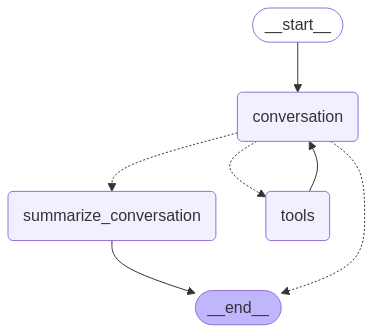

In [14]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [40]:
config = {'configurable': {'thread_id': '3'}}

while True:
    user_input = input('Enter your message (type "quit" to exit): ')
    if user_input.lower() == 'quit':
        print('Exiting the conversation. Goodbye!')
        break
    
    input_message = HumanMessage(content=user_input)
    outputs = graph.invoke({'messages': [input_message]}, config, stream_mode='updates')
    
    break
    for out in outputs:
        node_name = list(out.keys())[0]
        
        if isinstance(out[node_name]['messages'], list):
            for mess in out[node_name]['messages']:
                mess.pretty_print()
        else:
            out[node_name]['messages'].pretty_print()


In [99]:
from src.d00_utils.utils import parse_graph_output

In [108]:
tmp = parse_graph_output(outputs, debug=True)

content='Lo siento, no he podido encontrar el artículo 2 del Código Civil. La búsqueda me ha devuelto otros artículos pero no el que solicitaste. ¿Puedo ayudarte con alguna otra cosa?' additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []} id='run-80404c55-56df-4014-89b9-25cc5c1c09f1-0' usage_metadata={'input_tokens': 3573, 'output_tokens': 38, 'total_tokens': 3611, 'input_token_details': {'cache_read': 0}}


In [110]:
formatted_messages = []
for tag, content in tmp:
    # escaped_content = html.escape(content)
    if tag in ['fn', 'tool']:
        # Wrap messages in green text
        formatted_messages.append(f"<span style='color: green;'>{content}</span>")
    else:
        formatted_messages.append(content)

In [ ]:
for t in formatted_messages:
    print(t)

In [58]:
config = {'configurable': {'thread_id': '1'}}
graph_state = graph.get_state(config)
print(graph_state)

StateSnapshot(values={'messages': [HumanMessage(content='Sabes como me llamo?', additional_kwargs={}, response_metadata={}, id='05ec9be9-bb95-42d3-9edf-9beec7a8a184'), AIMessage(content='No te conozco, no sé cómo te llamas.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-f2eb9e5b-5196-4aef-b99b-e50962a9d260-0', usage_metadata={'input_tokens': 806, 'output_tokens': 10, 'total_tokens': 816, 'input_token_details': {'cache_read': 0}}), HumanMessage(content='Me llamo Edgar para que lo sepas', additional_kwargs={}, response_metadata={}, id='dea8a0c5-5c3a-49c2-a177-9269fcbda933'), AIMessage(content='Gracias, Edgar. Es un placer conocerte.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-afb0d8b3-1c87-4409-b10e-15626e854777-0', usage_metadata={'input_tokens': 824, 'output_

In [59]:
graph_state

StateSnapshot(values={'messages': [HumanMessage(content='Sabes como me llamo?', additional_kwargs={}, response_metadata={}, id='05ec9be9-bb95-42d3-9edf-9beec7a8a184'), AIMessage(content='No te conozco, no sé cómo te llamas.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-f2eb9e5b-5196-4aef-b99b-e50962a9d260-0', usage_metadata={'input_tokens': 806, 'output_tokens': 10, 'total_tokens': 816, 'input_token_details': {'cache_read': 0}}), HumanMessage(content='Me llamo Edgar para que lo sepas', additional_kwargs={}, response_metadata={}, id='dea8a0c5-5c3a-49c2-a177-9269fcbda933'), AIMessage(content='Gracias, Edgar. Es un placer conocerte.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-afb0d8b3-1c87-4409-b10e-15626e854777-0', usage_metadata={'input_tokens': 824, 'output_

In [60]:
graph_state

StateSnapshot(values={'messages': [HumanMessage(content='Sabes como me llamo?', additional_kwargs={}, response_metadata={}, id='05ec9be9-bb95-42d3-9edf-9beec7a8a184'), AIMessage(content='No te conozco, no sé cómo te llamas.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-f2eb9e5b-5196-4aef-b99b-e50962a9d260-0', usage_metadata={'input_tokens': 806, 'output_tokens': 10, 'total_tokens': 816, 'input_token_details': {'cache_read': 0}}), HumanMessage(content='Me llamo Edgar para que lo sepas', additional_kwargs={}, response_metadata={}, id='dea8a0c5-5c3a-49c2-a177-9269fcbda933'), AIMessage(content='Gracias, Edgar. Es un placer conocerte.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-afb0d8b3-1c87-4409-b10e-15626e854777-0', usage_metadata={'input_tokens': 824, 'output_

In [61]:
graph_state

StateSnapshot(values={'messages': [HumanMessage(content='Sabes como me llamo?', additional_kwargs={}, response_metadata={}, id='05ec9be9-bb95-42d3-9edf-9beec7a8a184'), AIMessage(content='No te conozco, no sé cómo te llamas.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-f2eb9e5b-5196-4aef-b99b-e50962a9d260-0', usage_metadata={'input_tokens': 806, 'output_tokens': 10, 'total_tokens': 816, 'input_token_details': {'cache_read': 0}}), HumanMessage(content='Me llamo Edgar para que lo sepas', additional_kwargs={}, response_metadata={}, id='dea8a0c5-5c3a-49c2-a177-9269fcbda933'), AIMessage(content='Gracias, Edgar. Es un placer conocerte.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-afb0d8b3-1c87-4409-b10e-15626e854777-0', usage_metadata={'input_tokens': 824, 'output_